<a href="https://colab.research.google.com/github/dxzwhite10/Jujun-Munawar_2306148_P7/blob/main/Praktikum_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CF 1

1. Mengubah nilai gejala pengguna yang sebelumnya adalah demam: 0.2, batuk: 0.3, dan sakit tenggorokan: 0.3, sehingga menghasilkan diagnosis flu dengan nilai: 0.46.

In [5]:
# Data gejala yang dirasakan user beserta nilai certainty factor (CF)
gejala_user = {
    "demam": 0.7,
    "batuk": 0.5,
    "sakit_tenggorokan": 0.6
}

# Basis pengetahuan pakar mengenai penyakit
pengetahuan = {
    "flu": {
        "demam": 0.8,
        "batuk": 0.7,
        "sakit_tenggorokan": 0.6
    }
}

# Fungsi untuk menghitung nilai certainty factor (CF)
def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True

    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar

            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)

    return cf_total

# Hitung CF untuk penyakit flu
cf_flu = hitung_cf(gejala_user, pengetahuan["flu"])

# Tampilkan hasil diagnosis
print(f"CF diagnosis Flu: {cf_flu:.2f}")


CF diagnosis Flu: 0.82


CF 2

In [7]:
# Data gejala yang dirasakan pengguna
gejala_user = {
    "nyeri_sendi": 0.8,
    "bengkak_sendi": 0.7,
    "kaku_sendi_pagi": 0.9,
    "demam_ringan": 0.3,
    "kelelahan": 0.6,
    "penurunan_berat_badan": 0.4,
    "kemerahan_sendi": 0.5,
    "gerakan_terbatas": 0.7,
    "suara_gemeretak_sendi": 0.5
}

# Basis pengetahuan pakar untuk dua penyakit
pengetahuan = {
    "rheumatoid_arthritis": {
        "nyeri_sendi": 0.9,
        "bengkak_sendi": 0.8,
        "kaku_sendi_pagi": 0.9,
        "demam_ringan": 0.4,
        "kelelahan": 0.7,
        "penurunan_berat_badan": 0.5,
        "kemerahan_sendi": 0.6,
        "gerakan_terbatas": 0.6,
        "suara_gemeretak_sendi": 0.2
    },
    "osteoarthritis": {
        "nyeri_sendi": 0.8,
        "bengkak_sendi": 0.6,
        "kaku_sendi_pagi": 0.5,
        "gerakan_terbatas": 0.7,
        "suara_gemeretak_sendi": 0.8,
        "kelelahan": 0.3,
        "kemerahan_sendi": 0.2
    }
}

# Fungsi untuk menghitung nilai certainty factor (CF)
def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True

    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar

            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)

    return cf_total

# Melakukan diagnosis untuk setiap penyakit berdasarkan gejala
for penyakit, data_pakar in pengetahuan.items():
    cf_result = hitung_cf(gejala_user, data_pakar)
    print(f"CF diagnosis {penyakit}: {cf_result:.2f}")


CF diagnosis rheumatoid_arthritis: 1.00
CF diagnosis osteoarthritis: 0.97


CF 3

In [ ]:
# Contoh 4: Diagnosis Diabetes dengan Gejala Berbobot

# Data gejala dari user beserta nilai CF-nya
gejala_user = {
    "sering_haus": 0.8,
    "sering_buang_air_kecil": 0.9,
    "penurunan_berat_badan": 0.6,
    "luka_lambat_sembuh": 0.7,
    "penglihatan_kabur": 0.5
}

# Pengetahuan pakar mengenai diabetes tipe 1 dan 2
pengetahuan = {
    "diabetes_tipe1": {
        "sering_haus": 0.9,
        "sering_buang_air_kecil": 0.9,
        "penurunan_berat_badan": 0.8,
        "luka_lambat_sembuh": 0.5
    },
    "diabetes_tipe2": {
        "sering_haus": 0.7,
        "sering_buang_air_kecil": 0.7,
        "penurunan_berat_badan": 0.5,
        "luka_lambat_sembuh": 0.8,
        "penglihatan_kabur": 0.6
    }
}

# Bobot tingkat kepentingan gejala (skala 1–5)
bobot_gejala = {
    "sering_haus": 4,
    "sering_buang_air_kecil": 4,
    "penurunan_berat_badan": 3,
    "luka_lambat_sembuh": 5,
    "penglihatan_kabur": 2
}
# Fungsi menghitung CF dengan bobot gejala
def hitung_cf_weighted(gejala_user, pengetahuan_pakar, bobot):
    cf_total = 0
    total_bobot = 0
    first = True

    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar and gejala in bobot:
            cf_pakar = pengetahuan_pakar[gejala]
            bobot_normal = bobot[gejala] / 5  # Normalisasi bobot (1-5) menjadi (0.2 - 1.0)
            cf = cf_user * cf_pakar * bobot_normal

            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)

            total_bobot += bobot_normal

    # Normalisasi hasil akhir berdasarkan total bobot
    if total_bobot > 0:
        jumlah_gejala_valid = len([g for g in gejala_user if g in pengetahuan_pakar])
        cf_total = cf_total / total_bobot * jumlah_gejala_valid

    return cf_total

# Menjalankan diagnosis berdasarkan gejala user dan bobot
for penyakit in pengetahuan:
    cf_result = hitung_cf_weighted(gejala_user, pengetahuan[penyakit], bobot_gejala)
    print(f"CF diagnosis {penyakit}: {cf_result:.2f}")


CF diagnosis diabetes_tipe1: 1.16
CF diagnosis diabetes_tipe2: 1.27


FL 1

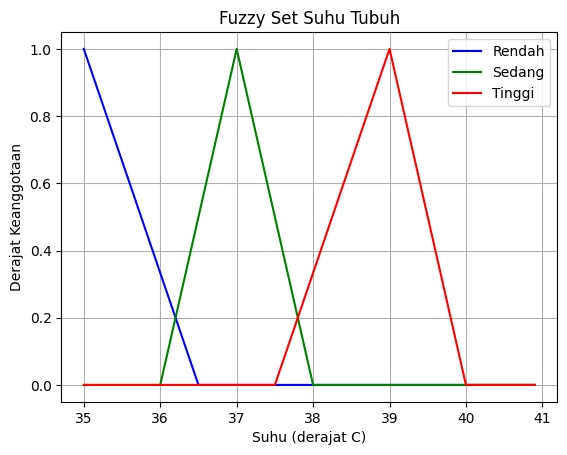

Derajat keanggotaan suhu 35.2 derajat C:
- Rendah : 0.87
- Sedang : 0.00
- Tinggi : 0.00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Rentang suhu dari 35 sampai 41 derajat Celsius, dengan interval 0.1
suhu = np.arange(35, 41, 0.1)

# Fungsi keanggotaan fuzzy (trapesium) untuk kategori suhu
rendah = fuzz.trimf(suhu, [35, 35, 36.5])
sedang = fuzz.trimf(suhu, [36, 37, 38])
tinggi = fuzz.trimf(suhu, [37.5, 39, 40])

# Visualisasi fungsi keanggotaan
plt.figure()
plt.plot(suhu, rendah, 'b', label='Rendah')
plt.plot(suhu, sedang, 'g', label='Sedang')
plt.plot(suhu, tinggi, 'r', label='Tinggi')
plt.title('Fuzzy Set Suhu Tubuh')
plt.xlabel('Suhu (derajat C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Input suhu pengguna
input_suhu = 35.2

# Derajat keanggotaan input terhadap setiap kategori
suhu_rendah = fuzz.interp_membership(suhu, rendah, input_suhu)
suhu_sedang = fuzz.interp_membership(suhu, sedang, input_suhu)
suhu_tinggi = fuzz.interp_membership(suhu, tinggi, input_suhu)

# Menampilkan hasil
print(f"Derajat keanggotaan suhu {input_suhu} derajat C:")
print(f"- Rendah : {suhu_rendah:.2f}")
print(f"- Sedang : {suhu_sedang:.2f}")
print(f"- Tinggi : {suhu_tinggi:.2f}")


FL 2

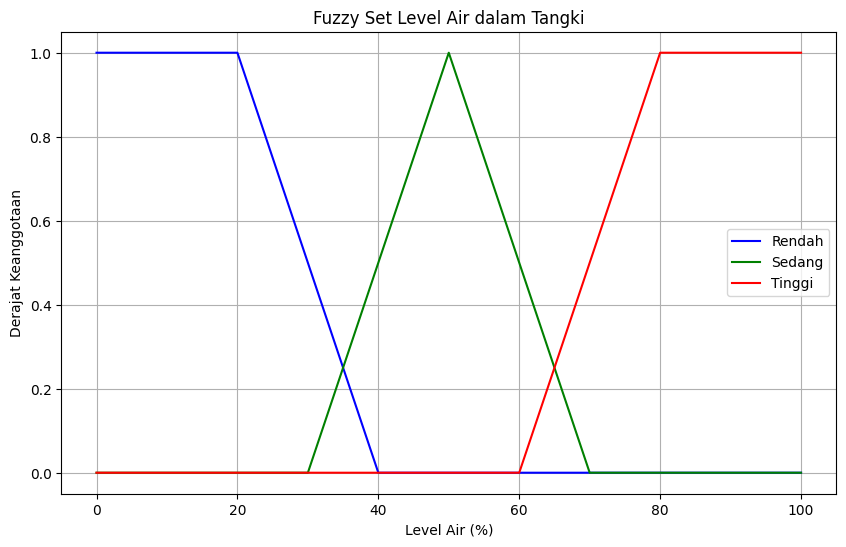

Derajat keanggotaan level air 25%:
- Rendah : 0.75
- Sedang : 0.00
- Tinggi : 0.00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Universe of discourse (0% - 100%)
level = np.arange(0, 101, 1)

# Fuzzy sets untuk level air: rendah, sedang, tinggi
rendah = fuzz.trapmf(level, [0, 0, 20, 40])
sedang = fuzz.trimf(level, [30, 50, 70])
tinggi = fuzz.trapmf(level, [60, 80, 100, 100])

# Visualisasi fuzzy sets
plt.figure(figsize=(10, 6))
plt.plot(level, rendah, 'b', linewidth=1.5, label='Rendah')
plt.plot(level, sedang, 'g', linewidth=1.5, label='Sedang')
plt.plot(level, tinggi, 'r', linewidth=1.5, label='Tinggi')
plt.title('Fuzzy Set Level Air dalam Tangki')
plt.xlabel('Level Air (%)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Input level air aktual
input_level = 25

# Hitung derajat keanggotaan input pada masing-masing kategori
level_rendah = fuzz.interp_membership(level, rendah, input_level)
level_sedang = fuzz.interp_membership(level, sedang, input_level)
level_tinggi = fuzz.interp_membership(level, tinggi, input_level)

# Tampilkan hasil derajat keanggotaan
print(f"Derajat keanggotaan level air {input_level}%:")
print(f"- Rendah : {level_rendah:.2f}")
print(f"- Sedang : {level_sedang:.2f}")
print(f"- Tinggi : {level_tinggi:.2f}")


FL 3

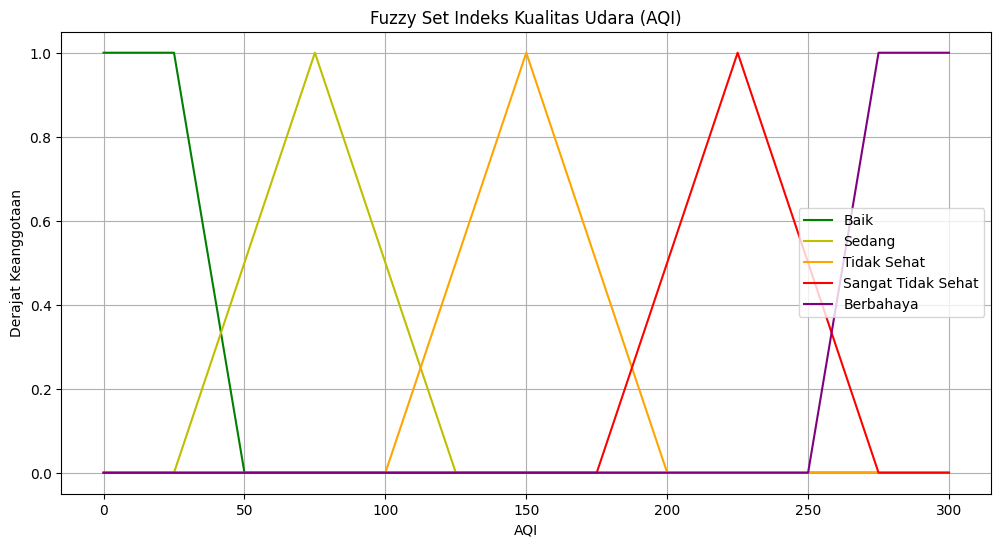

Derajat keanggotaan AQI 120:
- Baik                : 0.00
- Sedang              : 0.10
- Tidak Sehat         : 0.40
- Sangat Tidak Sehat  : 0.00
- Berbahaya           : 0.00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Universe of discourse (rentang nilai AQI)
aqi = np.arange(0, 301, 1)

# Fuzzy sets untuk kategori AQI
baik = fuzz.trapmf(aqi, [0, 0, 25, 50])
sedang = fuzz.trimf(aqi, [25, 75, 125])
tidak_sehat = fuzz.trimf(aqi, [100, 150, 200])
sangat_tidak_sehat = fuzz.trimf(aqi, [175, 225, 275])
berbahaya = fuzz.trapmf(aqi, [250, 275, 300, 300])

# Visualisasi fuzzy sets
plt.figure(figsize=(12, 6))
plt.plot(aqi, baik, 'g', linewidth=1.5, label='Baik')
plt.plot(aqi, sedang, 'y', linewidth=1.5, label='Sedang')
plt.plot(aqi, tidak_sehat, 'orange', linewidth=1.5, label='Tidak Sehat')
plt.plot(aqi, sangat_tidak_sehat, 'r', linewidth=1.5, label='Sangat Tidak Sehat')
plt.plot(aqi, berbahaya, 'purple', linewidth=1.5, label='Berbahaya')
plt.title('Fuzzy Set Indeks Kualitas Udara (AQI)')
plt.xlabel('AQI')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Nilai input AQI aktual
input_aqi = 120

# Hitung derajat keanggotaan untuk masing-masing kategori
aqi_baik = fuzz.interp_membership(aqi, baik, input_aqi)
aqi_sedang = fuzz.interp_membership(aqi, sedang, input_aqi)
aqi_tidak_sehat = fuzz.interp_membership(aqi, tidak_sehat, input_aqi)
aqi_sangat_tidak_sehat = fuzz.interp_membership(aqi, sangat_tidak_sehat, input_aqi)
aqi_berbahaya = fuzz.interp_membership(aqi, berbahaya, input_aqi)

# Tampilkan hasil keanggotaan
print(f"Derajat keanggotaan AQI {input_aqi}:")
print(f"- Baik                : {aqi_baik:.2f}")
print(f"- Sedang              : {aqi_sedang:.2f}")
print(f"- Tidak Sehat         : {aqi_tidak_sehat:.2f}")
print(f"- Sangat Tidak Sehat  : {aqi_sangat_tidak_sehat:.2f}")
print(f"- Berbahaya           : {aqi_berbahaya:.2f}")


FL 4

1. Perubahan input suhu menjadi 22°C menghasilkan output kecepatan AC sebesar 25%.

2. Menambahkan 3 aturan baru, yaitu:

Jika suhu nyaman dan kelembaban kering, maka kecepatan kipas AC akan rendah.

Jika suhu dingin dan kelembaban normal, maka kecepatan kipas AC akan rendah.

Jika suhu nyaman dan kelembaban kering, maka kecepatan kipas AC akan sedang.

3. Suhu 28°C memiliki keanggotaan di "Nyaman" dan "Panas" karena berada di batas antara kedua kategori tersebut dalam logika fuzzy.

Untuk suhu 30°C dan kelembaban 75%, kecepatan kipas AC: 25.00%


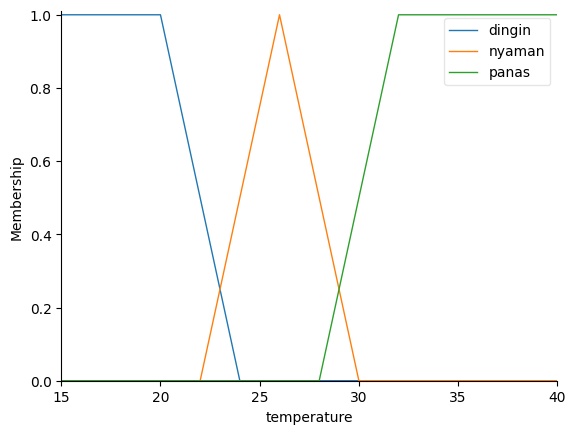

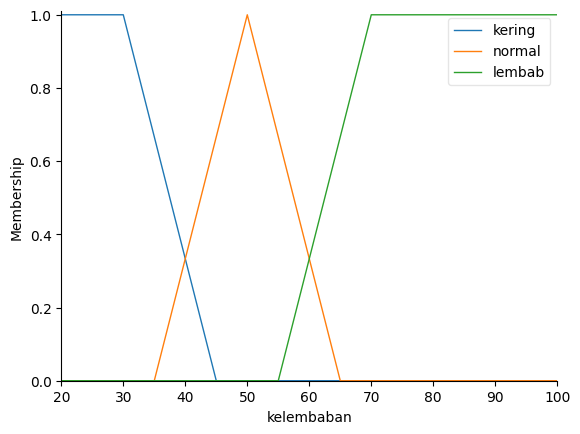

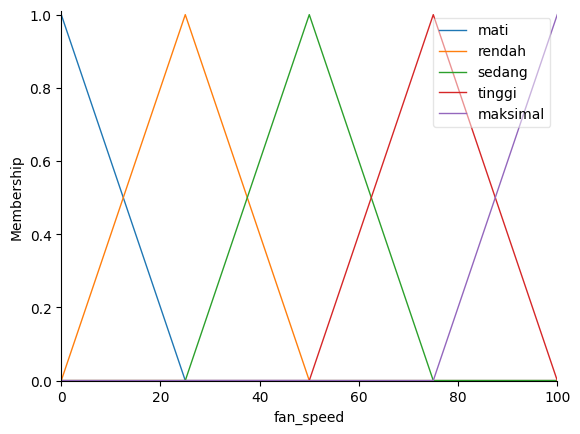

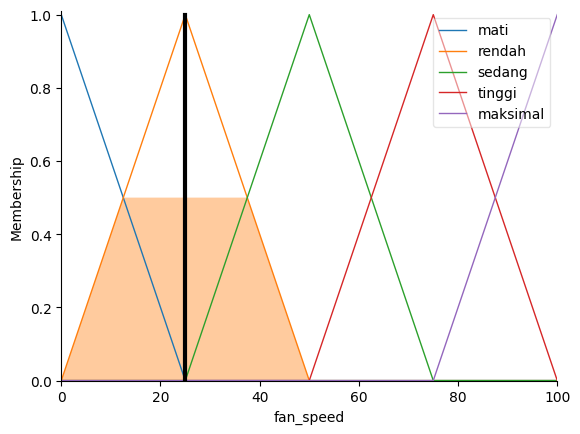

In [26]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Variabel input
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
kelembaban = ctrl.Antecedent(np.arange(20, 101, 1), 'kelembaban')

# Variabel output
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Fungsi keanggotaan untuk temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Fungsi keanggotaan untuk kelembaban
kelembaban['kering'] = fuzz.trapmf(kelembaban.universe, [20, 20, 30, 45])
kelembaban['normal'] = fuzz.trimf(kelembaban.universe, [35, 50, 65])
kelembaban['lembab'] = fuzz.trapmf(kelembaban.universe, [55, 70, 100, 100])

# Fungsi keanggotaan untuk fan_speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualisasi fungsi keanggotaan
temperature.view()
kelembaban.view()
fan_speed.view()

# Aturan fuzzy
rule1 = ctrl.Rule(temperature['dingin'] & kelembaban['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & kelembaban['normal'], fan_speed['rendah'])
rule3 = ctrl.Rule(temperature['dingin'] & kelembaban['lembab'], fan_speed['rendah'])

rule4 = ctrl.Rule(temperature['nyaman'] & kelembaban['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & kelembaban['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & kelembaban['lembab'], fan_speed['tinggi'])

rule7 = ctrl.Rule(temperature['panas'] & kelembaban['kering'], fan_speed['sedang'])
rule8 = ctrl.Rule(temperature['panas'] & kelembaban['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & kelembaban['lembab'], fan_speed['maksimal'])

# Aturan tambahan
rule10 = ctrl.Rule(temperature['nyaman'] & kelembaban['kering'], fan_speed['rendah'])
rule11 = ctrl.Rule(temperature['dingin'] & kelembaban['normal'], fan_speed['rendah'])
rule12 = ctrl.Rule(temperature['nyaman'] & kelembaban['kering'], fan_speed['sedang'])

# Membuat sistem kontrol fuzzy
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                               rule7, rule8, rule9, rule10, rule11])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Memberikan nilai input
ac.input['temperature'] = 22
ac.input['kelembaban'] = 75

# Menghitung hasil keluaran
ac.compute()
print(f"Untuk suhu 30°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

# Visualisasi hasil
fan_speed.view(sim=ac)
plt.show()